# Proyek Analisis Data pada E-Commerce Public Dataset

- **Nama:** Miiftahullah Surya Nugraha
- **Email:** miftahullahsuryan@gmail.com
- **ID Dicoding:** miftahsn

## Pertanyaan Bisnis yang diajukan

### Alasan dalam memilih dataset E-Commerece:
<p> karena tema dataset ini sering dijumpai dalam kehidupan sehari-hari, sehingga harapannya dengan memilih dataset ini saya bisa mendapatkan insight yang lebih mendalam dari hasil analisisnya karena saya sendiri juga merupakan customer dari E-commerce serta cukup tertarik dalam bidang bisnis dan finance</p>

*pertanyaan bisnis ini yang dijaidkan sebagai kompas dalam analisis ini nantinya*
- bagaimana penjualan pada setiap kategori produk?
- dengan mempertimbangkan lokasi, daerah mana yang banyak melakukan order di e-commerce ini?

## Import Packages/Library

**mengimport library yang dibutuhkan:**
- Pandas: untuk memanipulasi dan menganalisis data
- Numpy: untuk memproses nilai numerik yang dibutuhkan selama memproses data 
- Matplotlib dan Seaborn: untuk mengvisualisasikan data
- folium: untuk analis lanjutan (Analisis Geospatial)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### 1. Gathering Data
*ditahap ini saya akan akan membuat beberapa data frame dari dataset yang  dimiliki sekaligus melihat sekilas data-data tersebut untuk memutuskan tabel apa yang saya butuhkan utnuk menjawab pertanyaan dan untuk mengetahui apakah ada yang perlu di merge/join untuk menjawab pertanyaan bisnis yang saya ajukan*

In [3]:
#customer
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#loacation
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
#pemesanan/transaction
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_name_translation_df = pd.read_csv("data/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**memutuskan menggunakan data frame products,cusmtomer, product_caategory_nam_translation, dan order_items untuk menjawab pertanyaan**

In [11]:
print(product_category_name_translation_df.head())
print(products_df.head())
print(order_items_df.head())

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.

In [12]:
#mempersiapkan tabel untuk menjawab pertanyaan 1 => harga per kategori
penjualan_per_kategori_df= pd.merge(
    left= order_items_df,
    right= products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
print(penjualan_per_kategori_df)

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242a

In [13]:
'''tabel untuk pertanyaan ke 2 => customer state mana yang paling 
banyak mealkukan order?'''
location_order_df= pd.merge(
    left= orders_df,
    right= customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
print(location_order_df)


                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

**Insight:**
- disini saya melihat dataset saya melalui data frame agar lebih mudah melihat fitur-fitur dari tabelnya dan memutuskan tabel mana yang saya butuhkan untuk menjawab pertanyaan
- menyiapkan data frame yang akan digunakan untuk menjawab pertanyaan
- melakukan merge/join pada tabel jika memang diperlukan 

### Assessing Data

**tahap ini untuk mengidentifikasi masalah atau memeriksa kualitas/kelengkapan data**

In [14]:
#cek tabel pertanyaan 1
penjualan_per_kategori_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [15]:
penjualan_per_kategori_df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
dtype: int64

In [16]:
print("duplikasi tabel 1:", penjualan_per_kategori_df.duplicated().sum())

duplikasi tabel 1: 0


In [17]:
penjualan_per_kategori_df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


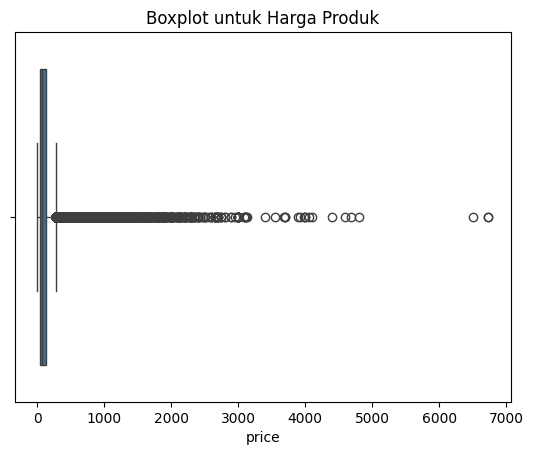

In [18]:
#cek oulier dengan boxplot
sns.boxplot(x=penjualan_per_kategori_df['price'])
plt.title('Boxplot untuk Harga Produk')
plt.show()

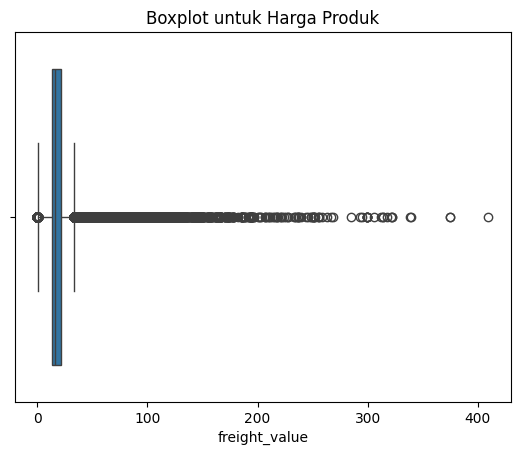

In [19]:
#cek oulier dengan boxplot
sns.boxplot(x=penjualan_per_kategori_df['freight_value'])
plt.title('Boxplot untuk Harga Produk')
plt.show()

**penilaian pada tabel 1:**
- terdapat sekitar seribu lebih data null pada fitur-fitur product di tabel yang sudah saya merge sebelumnya, jumlahnya tidak begitu besar jika dibandingkan keseluruhan jumlah data.
- tidak ada data yang duplicate
- saya memvisualisasikan data dengan boxplot untuk meelihat sekiranya ada pontensi outlier karaena saya sendiri juga tidak tau nama barang yang dijual didataset tidak ada product namenya jadi saya tidak bisa memasatikan apakah harga barang itu normal atau tidak tapi dilihar dari boxplot ini ada potensi outlier diharga tinggi

In [20]:
#cek data frame pertanyaan 2 
location_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


**tipe data yang tidak tepat**
- order_purchase_timestamp: object
- order_approved_at: object
- order_delivered_carrier_date:  object
- order_delivered_customer_date: object
- order_estimated_delivery_date: object
- customer_unique_id: object

In [21]:
location_order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [22]:
print("jumlah duplicate:", location_order_df.duplicated())

jumlah duplicate: 0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Length: 99441, dtype: bool


**Insight:**
- terdapat nilai nul di dataframe produts 
- terdapat tipe data yang tidak tepat
- tidak ada duplikasi
- untuk outlier dilihat sepertinya cukup aman dan fitur yang saya gunakan sebenarnya data kategorikal untuk menjawab pertanyaan no 2

### Cleaning Data

**cleaning data frame 1**

In [23]:
penjualan_per_kategori_df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [24]:
print(penjualan_per_kategori_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [25]:
#dropping nilai missing value 
print(penjualan_per_kategori_df.dropna(axis=0, inplace=True))
print(penjualan_per_kategori_df.isnull().sum())
print(penjualan_per_kategori_df.info())

None
order_id                      0
order_item_id                 0
product_id                    0
seller_id                     0
shipping_limit_date           0
price                         0
freight_value                 0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 111046 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    111046 non-null  object 
 1   order_item_id               111046 non-null  int64  
 2   product_id                  111046 non-null  object 
 3   seller_id                   111046 non-null  object 
 4   shipping_limit_date         111046 non-null

In [26]:
#dropping outlier dengan iqr
Q1 = penjualan_per_kategori_df['freight_value'].quantile(0.25)
Q3 = penjualan_per_kategori_df['freight_value'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = penjualan_per_kategori_df['freight_value'] < minimum
kondisi_more_than = penjualan_per_kategori_df['freight_value'] > maximum
penjualan_per_kategori_df = penjualan_per_kategori_df[~kondisi_lower_than & ~kondisi_more_than]

penjualan_per_kategori_df.describe()


,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000
mean,1.199479,102.418712,16.148988,48.777606,768.371723,2.195976,1470.346103,28.877694,15.187769,22.024772
std,0.710056,130.239800,5.485255,10.042813,639.867321,1.712637,2400.636928,14.839256,11.365100,10.574183
min,1.000000,0.850000,0.960000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,38.400000,12.770000,42.000000,341.000000,1.000000,250.000000,18.000000,8.000000,15.000000
50%,1.000000,69.000000,15.650000,52.000000,589.000000,1.000000,600.000000,24.000000,12.000000,19.000000
75%,1.000000,119.990000,18.840000,57.000000,955.000000,3.000000,1500.000000,35.000000,20.000000,29.000000
max,21.000000,3999.900000,33.330000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight cleaning 1**
- dropping data yang missing value
- duplikasi tidak ada berdasarkan proses asseing sebelumnya
- outlier dihapus menggunakan IQR untuk memastikan data lebih konsisten dan tidak terdistorsi oleh nilai ekstrem yang dapat mempengaruhi analisis, meskipun saya sebeanrnya tidak mengetahui jenis transaksi atau barang. tapi agar data yang dianalisis nanti valid tanpa data kesalahan input dan semacamnya saya menggunakan metode ini untuk berjaga-jaga.
- hasil haput baris outlier dengan iqr tidak begitu banyak dari jumlah total data jadi saya memutuskan untuk tetap melakukannya (sekitar 10% dengan dropping berdasarkan 2 fitur yaitu "price" dan " freight_value")

**clenaing data frame 2** 

In [27]:
print(location_order_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB
None


In [28]:
#ubah tipe data yang tidak sesuai
location_order_df['order_purchase_timestamp'] = pd.to_datetime(location_order_df['order_purchase_timestamp'])
location_order_df['order_approved_at'] = pd.to_datetime(location_order_df['order_approved_at'])
location_order_df['order_delivered_carrier_date'] = pd.to_datetime(location_order_df['order_delivered_carrier_date'])
location_order_df['order_delivered_customer_date'] = pd.to_datetime(location_order_df['order_delivered_customer_date'])
location_order_df['order_estimated_delivery_date'] = pd.to_datetime(location_order_df['order_estimated_delivery_date'])

In [29]:
#dropping nilai missing value 
print(location_order_df.dropna(axis=0, inplace=True))
print(location_order_df.isnull().sum())
print(location_order_df.info())

None
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  date

In [30]:
location_order_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,96461,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,93342,NaN,4085,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,15,NaN,15044,40489
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,NaN,35198.925825,NaN,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,NaN,11355.000000,NaN,NaN
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,NaN,24436.000000,NaN,NaN
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,NaN,59056.000000,NaN,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN,99980.000000,NaN,NaN


**Insight:**
- tidak terlalu banyak yang di clenaing hanya missing value
- mengubah tipe data yang tidak sesuai dari fitur 
- duplikasi tidak ada berdasarkan proses asseing sebelumnya
- karena kebanyakan fitur data frame ke 2 ini merupkan data kategorikal saya tidak menerapkan metode iqr seperti sebelumnya 

## Exploratory Data Analysis (EDA)

### Explore data frame 1

In [31]:
#describe all
penjualan_per_kategori_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,99063,99063.000000,99063,99063,99063,99063.000000,99063.000000,99063,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000,99063.000000
unique,86821,NaN,29374,2861,82581,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,476,1975,21,NaN,NaN,10444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.199479,NaN,NaN,NaN,102.418712,16.148988,NaN,48.777606,768.371723,2.195976,1470.346103,28.877694,15.187769,22.024772
std,NaN,0.710056,NaN,NaN,NaN,130.239800,5.485255,NaN,10.042813,639.867321,1.712637,2400.636928,14.839256,11.365100,10.574183
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.960000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,1.000000,NaN,NaN,NaN,38.400000,12.770000,NaN,42.000000,341.000000,1.000000,250.000000,18.000000,8.000000,15.000000
50%,NaN,1.000000,NaN,NaN,NaN,69.000000,15.650000,NaN,52.000000,589.000000,1.000000,600.000000,24.000000,12.000000,19.000000
75%,NaN,1.000000,NaN,NaN,NaN,119.990000,18.840000,NaN,57.000000,955.000000,3.000000,1500.000000,35.000000,20.000000,29.000000


array([[<Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>],
       [<Axes: title={'center': 'product_name_lenght'}>,
        <Axes: title={'center': 'product_description_lenght'}>,
        <Axes: title={'center': 'product_photos_qty'}>],
       [<Axes: title={'center': 'product_weight_g'}>,
        <Axes: title={'center': 'product_length_cm'}>,
        <Axes: title={'center': 'product_height_cm'}>],
       [<Axes: title={'center': 'product_width_cm'}>, <Axes: >, <Axes: >]],
      dtype=object)

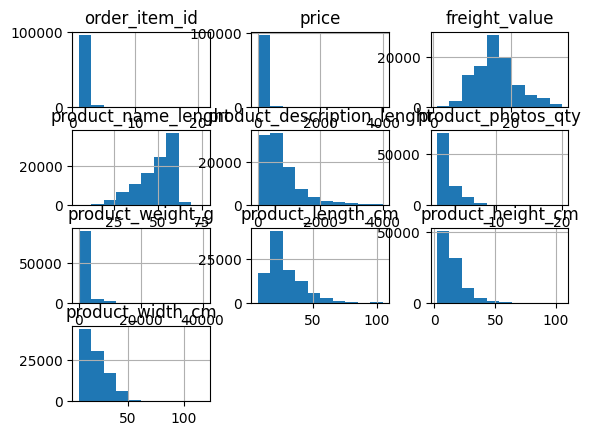

In [32]:
#melihat distribusi data setiap fitur
penjualan_per_kategori_df.hist()

In [33]:
#explore jumlah penjualan barang di setiap kategori produk
penjualan_per_kategori_df['jumlah_pesanan'] = penjualan_per_kategori_df.groupby('product_category_name')['order_id'].transform('count')

count_sales_kategori_df = penjualan_per_kategori_df[['product_category_name', 'jumlah_pesanan']].drop_duplicates().sort_values(by='jumlah_pesanan', ascending=False)

print(count_sales_kategori_df)

               product_category_name  jumlah_pesanan
12                   cama_mesa_banho           10444
8                       beleza_saude            8934
15                     esporte_lazer            7932
2                   moveis_decoracao            7272
46            informatica_acessorios            7045
...                              ...             ...
12745                     la_cuisine              10
12976                       pc_gamer               9
26331  fashion_roupa_infanto_juvenil               8
24430      moveis_colchao_e_estofado               7
19285             seguros_e_servicos               2

[73 rows x 2 columns]


In [34]:
#translation agar mbahsa yang digubanakn lebih umum dan mudah dimengerti
produk_per_kategori_translation_df = pd.merge(count_sales_kategori_df, product_category_name_translation_df, on='product_category_name', how='left')
print(produk_per_kategori_translation_df)

            product_category_name  jumlah_pesanan  \
0                 cama_mesa_banho           10444   
1                    beleza_saude            8934   
2                   esporte_lazer            7932   
3                moveis_decoracao            7272   
4          informatica_acessorios            7045   
..                            ...             ...   
68                     la_cuisine              10   
69                       pc_gamer               9   
70  fashion_roupa_infanto_juvenil               8   
71      moveis_colchao_e_estofado               7   
72             seguros_e_servicos               2   

        product_category_name_english  
0                      bed_bath_table  
1                       health_beauty  
2                      sports_leisure  
3                     furniture_decor  
4               computers_accessories  
..                                ...  
68                         la_cuisine  
69                                NaN  
70 

In [35]:
#explore total penjualan di setiap kategori produk
total_sales_kategori = penjualan_per_kategori_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False).reset_index()
total_sales_kategori.columns = ['product_category_name', 'total_sales']

print(total_sales_kategori.head())


    product_category_name  total_sales
0      relogios_presentes   1073018.76
1            beleza_saude   1028638.73
2         cama_mesa_banho    913909.82
3           esporte_lazer    785602.87
4  informatica_acessorios    736194.83


In [36]:
#menggabungkan toal jumlah penjualan produk dan sales per kategori
combined_sales_kategori_df = pd.DataFrame({
    'product_category_name_english': produk_per_kategori_translation_df['product_category_name_english'],
    'jumlah_pesanan': produk_per_kategori_translation_df ['jumlah_pesanan'],
    'total_sales': total_sales_kategori['total_sales']
})

print(combined_sales_kategori_df)

        product_category_name_english  jumlah_pesanan  total_sales
0                      bed_bath_table           10444   1073018.76
1                       health_beauty            8934   1028638.73
2                      sports_leisure            7932    913909.82
3                     furniture_decor            7272    785602.87
4               computers_accessories            7045    736194.83
..                                ...             ...          ...
68                         la_cuisine              10       911.53
69                                NaN               9       760.27
70          fashion_childrens_clothes               8       665.00
71  furniture_mattress_and_upholstery               7       569.85
72              security_and_services               2       283.29

[73 rows x 3 columns]


### Explore data frame 2

In [37]:
#cek first
location_order_df.describe(include='all') 
location_order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [38]:
#explore asal custoemr yang melakukan order

#berdsaarkan kota
order_per_city = location_order_df.groupby('customer_city')['order_id'].count().reset_index()
order_per_city.columns = ['customer_city', 'jumlah_pesanan']
order_per_city = order_per_city.sort_values(by='jumlah_pesanan', ascending=False)

#berdasarakan negara bagian
order_per_state = location_order_df.groupby('customer_state')['order_id'].count().reset_index()
order_per_state.columns = ['customer_state', 'jumlah_pesanan']
order_per_state = order_per_state.sort_values(by='jumlah_pesanan', ascending=False)

print(order_per_city)
print(order_per_state)

           customer_city  jumlah_pesanan
3563           sao paulo           15044
3126      rio de janeiro            6603
449       belo horizonte            2697
553             brasilia            2071
1135            curitiba            1489
...                  ...             ...
2923          ponto novo               1
2921  ponto do marambaia               1
2920          ponto belo               1
2919       pontes gestal               1
3079        retirolandia               1

[4085 rows x 2 columns]
   customer_state  jumlah_pesanan
25             SP           40489
18             RJ           12351
10             MG           11352
22             RS            5342
17             PR            4923
23             SC            3547
4              BA            3256
6              DF            2080
7              ES            1995
8              GO            1957
15             PE            1593
5              CE            1278
13             PA             946
12     

**Insight 1:**
- pada data frame pertama kita mengexplore tentang keterkaitan antara sales dengan category produk

**Insight 2:**
- explore pada data frame kedua terkait jumlah penjualan berdasarakan asal/domisili custoemer

## Visualization & Explanatory Analysis

**Disini visualisasi yang saya buat menggunakan bar chart 
vertikal digunakan karena mudah untuk membandingkan kategori satu sama lain. 
Kategori ditampilkan di sumbu X dan nilai-nya di sumbu Y, sehingga kita bisa melihat 
panjang batang untuk mengetahui perbandingannya. saya rasa inicocok untuk data kategori seperti 
kategori atau kota, dan lebih mudah dibaca karena label kategori bisa diletakkan secara 
jelas di bawah bar.**

### Pertanyaan 1:

<Figure size 1200x1000 with 0 Axes>

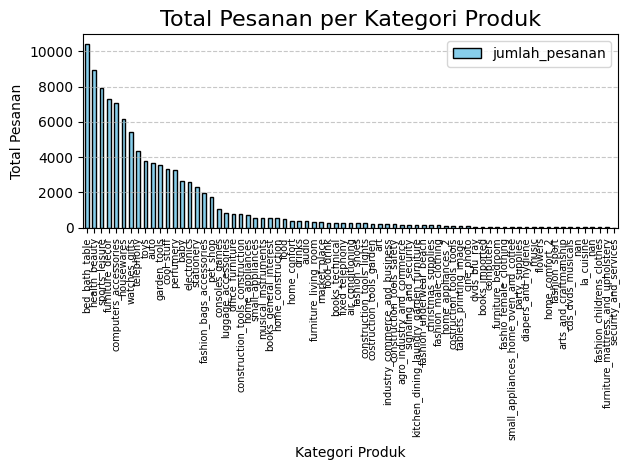

In [39]:
#visualisasi total order per kategori dengan matplotlib
plt.figure(figsize=(12, 10))
combined_sales_kategori_df[['product_category_name_english', 'jumlah_pesanan']] \
    .set_index('product_category_name_english') \
    .plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Pesanan per Kategori Produk', fontsize=16) 
plt.xlabel('Kategori Produk', fontsize=10)
plt.ylabel('Total Pesanan', fontsize=10)
plt.xticks(rotation=90, fontsize=7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

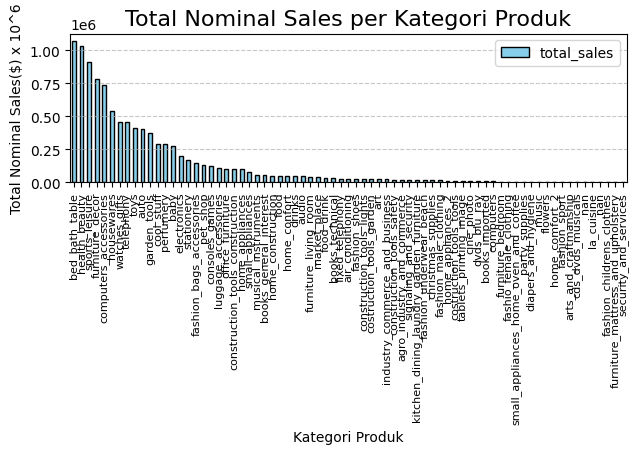

In [40]:
#visualisasi total nominal per kategori dengan matplotlib
plt.figure(figsize=(12,10))
combined_sales_kategori_df[['product_category_name_english', 'total_sales']].set_index('product_category_name_english').plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Nominal Sales per Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=10)
plt.ylabel('Total Nominal Sales($) x 10^6', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Kategori 10 Teratas**

<Figure size 1200x1000 with 0 Axes>

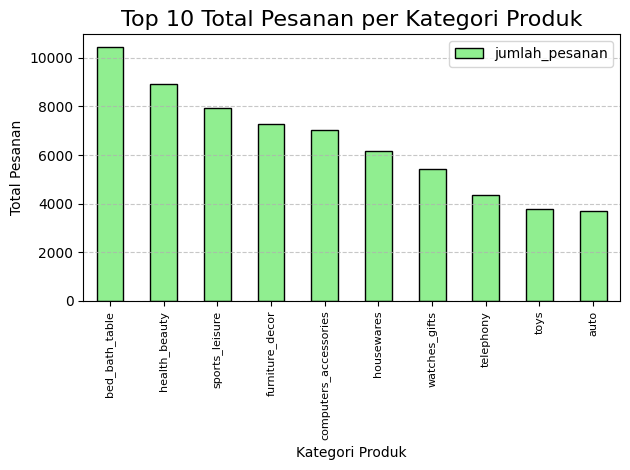

In [41]:
#visualisasi data teratas agar mendapat gambaran yang lebih jelas 
top_kategori = combined_sales_kategori_df.head(10)
plt.figure(figsize=(12, 10))
top_kategori[['product_category_name_english', 'jumlah_pesanan']].set_index('product_category_name_english').plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Total Pesanan per Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=10)
plt.ylabel('Total Pesanan', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

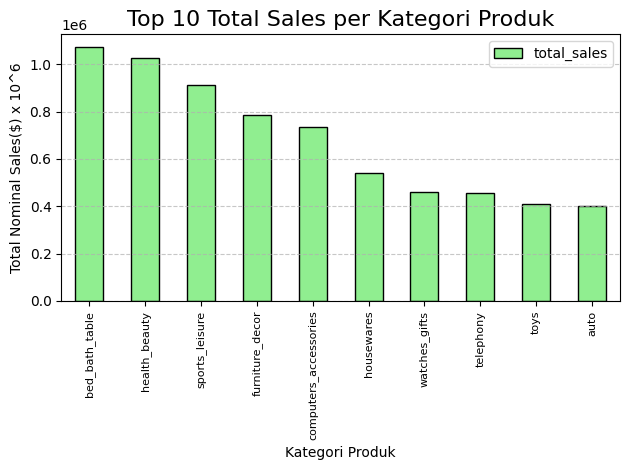

In [42]:
#visualisasi data teratas agar mendapat gambaran yang lebih jelas 
top_kategori = combined_sales_kategori_df.head(10)
plt.figure(figsize=(12, 10))
top_kategori[['product_category_name_english', 'total_sales']].set_index('product_category_name_english').plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Total Sales per Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=10)
plt.ylabel('Total Nominal Sales($) x 10^6', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Kategori 10 Terbawah**

<Figure size 1200x1000 with 0 Axes>

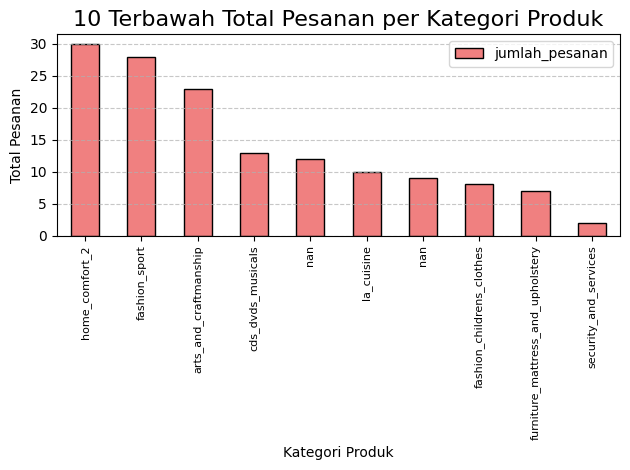

In [43]:
bottom_kategori = combined_sales_kategori_df.tail(10)
plt.figure(figsize=(12, 10))
bottom_kategori[['product_category_name_english', 'jumlah_pesanan']].set_index('product_category_name_english').plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('10 Terbawah Total Pesanan per Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=10)
plt.ylabel('Total Pesanan', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

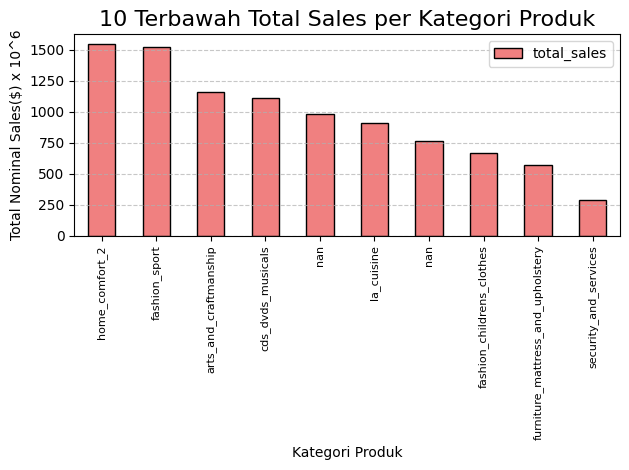

In [44]:
bottom_kategori = combined_sales_kategori_df.tail(10)
plt.figure(figsize=(12, 10))
bottom_kategori[['product_category_name_english', 'total_sales']].set_index('product_category_name_english').plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('10 Terbawah Total Sales per Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk', fontsize=10)
plt.ylabel('Total Nominal Sales($) x 10^6', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**insight pertanyaan 1:**
- Dari visualisasi yang diperoleh, terlihat jelas bahwa beberapa kategori produk di e-commerce ini mendominasi penjualan, dengan "bed_bath_table" dan "health_beauty" menduduki posisi teratas dalam hal jumlah penjualan dan total nominal penjualan. Hal ini mengindikasikan bahwa produk rumah tangga dan kecantikan lebih sering dipilih oleh konsumen.
- Sebaliknya, kategori dengan penjualan rendah seperti "security_and_services","furniture..." dan "fashion_childrens_clothes" menunjukkan bahwa tidak semua kategori memiliki pasar yang besar. Ini bisa menjadi peluang untuk mengeksplorasi strategi pemasaran atau penyesuaian produk di kategori-kategori tersebut.


### Pertanyaan 2:

In [45]:
order_per_city.head()

,customer_city,jumlah_pesanan
3563,sao paulo,15044
3126,rio de janeiro,6603
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1489


<Figure size 1200x1000 with 0 Axes>

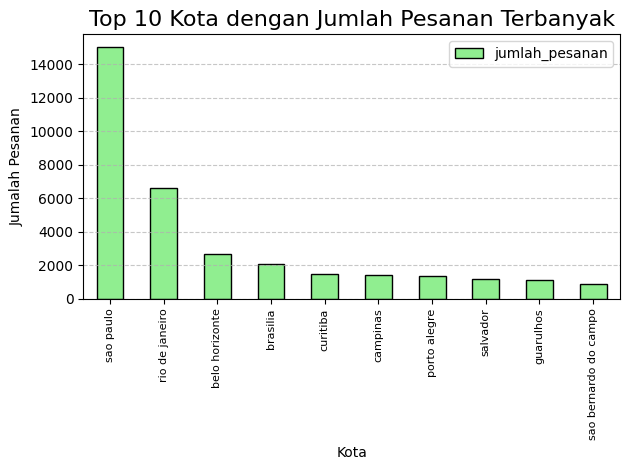

In [46]:
top_city = order_per_city.head(10)
plt.figure(figsize=(12, 10))
top_city[['customer_city', 'jumlah_pesanan']].set_index('customer_city').plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Kota dengan Jumlah Pesanan Terbanyak', fontsize=16)
plt.xlabel('Kota', fontsize=10)
plt.ylabel('Jumalah Pesanan', fontsize=10)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
order_per_state.head()

,customer_state,jumlah_pesanan
25,SP,40489
18,RJ,12351
10,MG,11352
22,RS,5342
17,PR,4923


<Figure size 1200x1000 with 0 Axes>

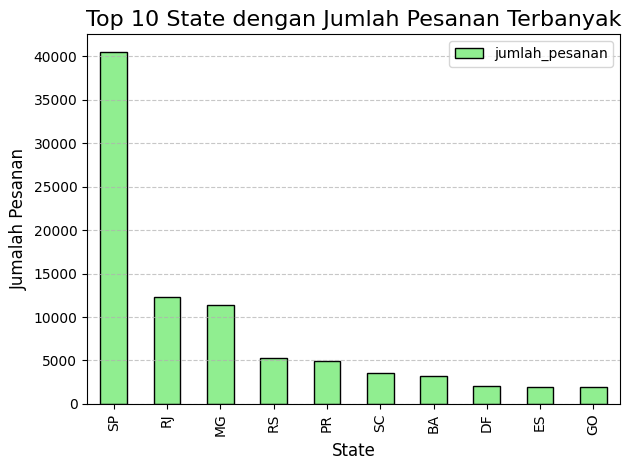

In [48]:
top_state = order_per_state.head(10)
plt.figure(figsize=(12, 10))
top_state[['customer_state', 'jumlah_pesanan']].set_index('customer_state').plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 State dengan Jumlah Pesanan Terbanyak', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Jumalah Pesanan', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**insight pertanyaan 2:**
- Terlihat bahwa kota Sao Paulo memiliki jumlah pesanan terbanyak dibandingkan kota lainnya. Kota ini jauh lebih dominan, diikuti oleh Rio de Janeiro dan Belo Horizonte, namun dengan selisih yang signifikan. Di tingkat negara bagian, state SP juga menonjol dengan jumlah pesanan yang sangat tinggi, diikuti oleh RJ dan MG.
- Sao paulo merupakan pusat ekonomi terbesar di brasil, yang mungkin dapat menjelaskan mengapa kota ini mendominasi jumlah pesanan. kemudian di tingkat negara bagian, SP masih mendominasi karena disitu memiliki populasi yang besar.
- Beberapa tempat sanagat jauh bedanya dengan kota-kota ataupun negara bagian yang menjadi pusat ekonomi, bisa diindikasan terdapat faktor yang mungkin memperngaruhi sediktnya cutomer yang berada didaerah-daerah tersebut untuk melakukan order semisal seperti infrastruktur yang kurang merata sehingga distribusi menjadi sulit.

## Analisis Lanjutan (Opsional)

**saya mau mencoba menerapkan geospatial analysis dari data yang saya punya tapi ditambahkan dengan geolocation**

In [49]:
location_order_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,39382392765b6dc74812866ee5ee92a7,99655,faxinalzinho,RS
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ


In [50]:
geolocation_df.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [51]:
location_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   customer_unique_id             96461 non-null  object        
 9   customer_zip_code_prefix       96461 non-null  int64         
 10  customer_city                  96461 non-null  object        
 11  customer_state      

In [52]:
'''merger tabel untuk mempersiapk dataframe teknik analisis geospatial analysis'''
geolocation_order_df= pd.merge(
    left= location_order_df,
    right= geolocation_df[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']],
    how="inner",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
print(geolocation_order_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14651222 entries, 0 to 14651221
Data columns (total 15 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              datetime64[ns]
 5   order_delivered_carrier_date   datetime64[ns]
 6   order_delivered_customer_date  datetime64[ns]
 7   order_estimated_delivery_date  datetime64[ns]
 8   customer_unique_id             object        
 9   customer_zip_code_prefix       int64         
 10  customer_city                  object        
 11  customer_state                 object        
 12  geolocation_zip_code_prefix    int64         
 13  geolocation_lat                float64       
 14  geolocation_lng                float64       
dtypes: datetime64

In [53]:
#make sure nda ada data null nya
print(geolocation_order_df.isnull().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
geolocation_zip_code_prefix      0
geolocation_lat                  0
geolocation_lng                  0
dtype: int64


***Dari jumlah data yang bertambah tidak wajar sepertinya terjadi duplikat ketika melakukan merger'
jadi saya memutuskan untuk menghapus berdasarakan order_id nya yang mana order_id setiap pesanan harusnya berbeda***

In [54]:
print(geolocation_order_df.duplicated(subset='order_id').sum())


14555025


In [55]:
geolocation_order_df = geolocation_order_df.drop_duplicates(subset='order_id')
print(geolocation_order_df.duplicated().sum())

0


In [56]:
geolocation_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96197 entries, 0 to 14651077
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96197 non-null  object        
 1   customer_id                    96197 non-null  object        
 2   order_status                   96197 non-null  object        
 3   order_purchase_timestamp       96197 non-null  datetime64[ns]
 4   order_approved_at              96197 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96197 non-null  datetime64[ns]
 6   order_delivered_customer_date  96197 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96197 non-null  datetime64[ns]
 8   customer_unique_id             96197 non-null  object        
 9   customer_zip_code_prefix       96197 non-null  int64         
 10  customer_city                  96197 non-null  object        
 11  customer_state   

In [57]:
m = folium.Map(location=[geolocation_order_df['geolocation_lat'].mean(), geolocation_order_df['geolocation_lng'].mean()], zoom_start=12)

for _, row in geolocation_order_df.iterrows():
    folium.CircleMarker([row['geolocation_lat'], row['geolocation_lng']], radius=2, color='blue').add_to(m)

m.save('geospatial_map.html')

### Insight
**Dari hasil geospatial analysis itu saya melihat persebaran pemesanan produk lebih jelas dalam map**

## Conclusion

**Kesimpulan dari hasil analisi ini:**
- Dengan hasil yang sudah dijabarkan sebelumnya maka e c-commerce/platform ini dapat fokus untuk memperkuat penjualan di kategori yang sudah terbukti diminati sambil merancang strategi untuk meningkatkan kategori yang lebih rendah penjualannya.
- Berdsarakan analis dari persebaran customer yang melakukan order, diketahui bahwa kota-kota pusat memiliki jumlah customer dan jumlah order yang lebih banyak dibandingkan daerah-daerah pinggir, sebagai pertimbangan e-commerce dapatmenyesuaikan strategi bisnisnya baik itu memaksimalkan pontensi kota-kota yang ramai order ataupun berusaha menggaet customer dari daerah daerha pinggir agar tertarik melakukan order dengan menyelesaikan masalah masing-masing setiap daerah miliki.

## PERSIAPAPAN DASHBOARD/ STREAMLIT

In [ ]:
#saya mendownload dataframe yang dibutuhkan untuk di tmapilkan pada dsahboard 
combined_sales_kategori_df.to_csv('dashboard/combined_sales_kategori_df.csv', index=False)
order_per_city.to_csv('dashboard/order_per_city_df.csv', index=False)
order_per_state.to_csv('dashboard/order_per_state_df.csv', index=False)